# EEG Net Accuracy

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

from EEGModels import EEGNet
from utils import get_data

In [5]:
CLASS_DICT = {
    0: "W",
    1: "N1",
    2: "N2",
    3: "N3",
    4: "REM"
}

In [8]:
model = tf.keras.saving.load_model('models/eegNet/initial/trained_model.h5')

train_ds, val_ds, test_ds, class_weights, max_len = get_data(batch_size=64)

Load training set:
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4031E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4032E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4041E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4042E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4051E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4052E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4061E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4062E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4071E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4072E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4081E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4082E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepared/fpz_cz/SC4091E0.npz ...
Loading ../SESM/datasets/eeg/sleep_edf/prepar

Test Loss: 0.7714
Test Accuracy: 67.80%
64/64 [==============================] - 1s 21ms/step


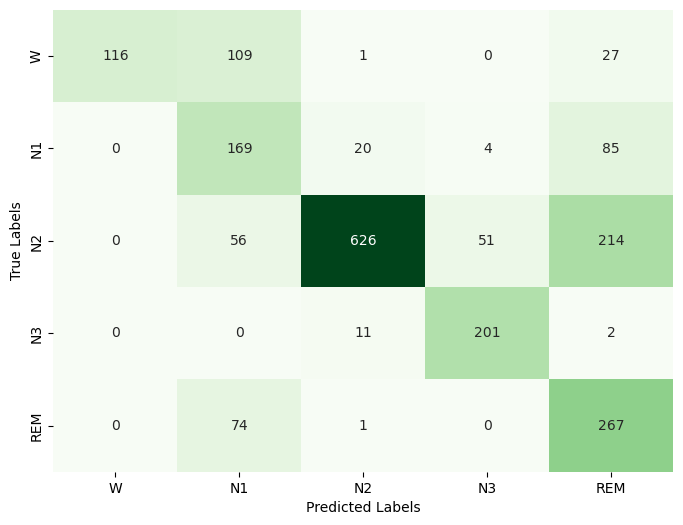

              precision    recall  f1-score   support

           W       1.00      0.46      0.63       253
          N1       0.41      0.61      0.49       278
          N2       0.95      0.66      0.78       947
          N3       0.79      0.94      0.86       214
         REM       0.45      0.78      0.57       342

    accuracy                           0.68      2034
   macro avg       0.72      0.69      0.67      2034
weighted avg       0.78      0.68      0.69      2034



Accuracy for W: 45.85%
Accuracy for N1: 60.79%
Accuracy for N2: 66.10%
Accuracy for N3: 93.93%
Accuracy for REM: 78.07%


In [9]:
# Extract data and labels from the dataset
test_data = []
test_labels = []
for x, y in test_ds:
    test_data.append(x)
    test_labels.append(y)

# Concatenate the dataset batches into NumPy arrays
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

# Make predictions on the test data
predictions = model.predict(test_data)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
confusion = confusion_matrix(test_labels, predicted_labels)

class_names = CLASS_DICT.values()

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.gca().set_xticklabels(class_names)
plt.ylabel('True Labels')
plt.gca().set_yticklabels(class_names)
plt.show()

# Generate a classification report
report = classification_report(test_labels, predicted_labels, target_names=class_names)
print(report)

# Calculate class-wise accuracy
class_accuracy = confusion.diagonal()/confusion.sum(axis=1)

print("\n")
# Print class-wise accuracy
for i, class_name in enumerate(class_names):
    print(f'Accuracy for {class_name}: {class_accuracy[i]*100:.2f}%')

plt.show()